#                 BIKE SHARING DATA ASSIGNMENT

In [2]:
### Reading and Understanding the Data

In [414]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [288]:
## Reading the .csv file
bikedata= pd.read_csv('C:/Users/vinur/Personal/Upgrad/day.csv')

In [289]:
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [290]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [291]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [292]:
bikedata.shape

(730, 16)

# Data Quality Check

In [293]:
bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [294]:
bikedata.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [295]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Removing Redundant and Unwanted columns

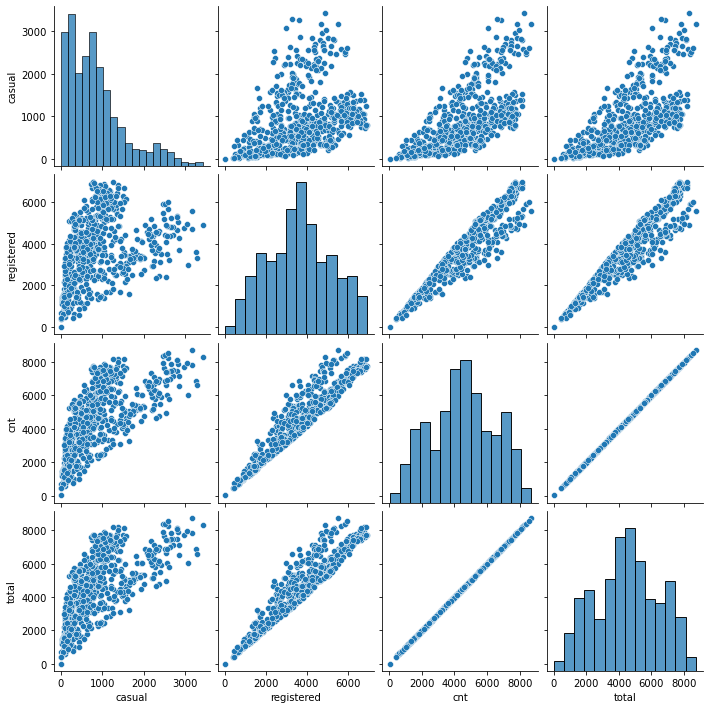

In [296]:
# Checking the relationship between 'casual','registered' and 'cnt' columns.

bikedata_cnt= bikedata[['casual','registered','cnt']]

# Creating a column which shows the total values of 'casual' and 'registered' columns.

bikedata_cnt['total']= bikedata_cnt['casual'] + bikedata_cnt['registered']
sns.pairplot(bikedata_cnt)
plt.show()

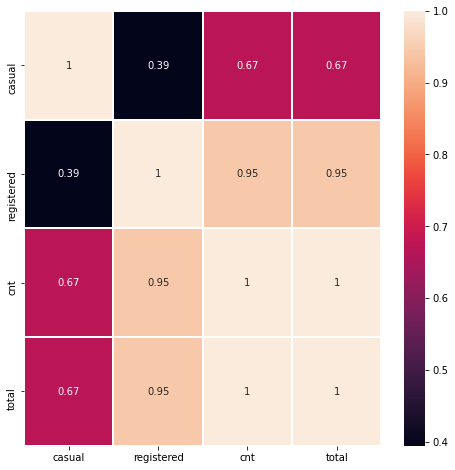

In [297]:
# Checking the correlation of the variables.

plt.figure(figsize=(8,8))
ax= sns.heatmap(bikedata_cnt.corr(), annot = True, linewidth=1)

#### Dropping the unwanted columns 

In [298]:
bikedata.drop(['instant','dteday','casual','registered'],axis= 1, inplace= True)
bikedata.shape

(730, 12)

In [299]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [300]:
bikedata['season']= bikedata.season.map({1:'S1_spring', 2:'S2_summer', 3:'S3_fall', 4:'S4_winter'})
bikedata['mnth'] = bikedata.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikedata['weekday'] = bikedata.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bikedata['weathersit']= bikedata.weathersit.map({1:'clear', 2:'misty', 3:'lightrain_snow', 4:'heavyrain_snow'})


In [301]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,S1_spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,S1_spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,S1_spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,S1_spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,S1_spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [302]:
bikedata.season.value_counts(normalize= True)

S3_fall      0.257534
S2_summer    0.252055
S1_spring    0.246575
S4_winter    0.243836
Name: season, dtype: float64

In [303]:
bikedata.mnth.value_counts(normalize= True)

jul    0.084932
oct    0.084932
mar    0.084932
may    0.084932
jan    0.084932
aug    0.084932
dec    0.084932
jun    0.082192
nov    0.082192
apr    0.082192
sep    0.082192
feb    0.076712
Name: mnth, dtype: float64

In [304]:
bikedata.weekday.value_counts(normalize= True)

mon    0.143836
tue    0.143836
wed    0.142466
sat    0.142466
sun    0.142466
fri    0.142466
thu    0.142466
Name: weekday, dtype: float64

In [305]:
bikedata.weathersit.value_counts(normalize= True)

clear             0.634247
misty             0.336986
lightrain_snow    0.028767
Name: weathersit, dtype: float64

## DATA VISUALIZATION

### Categorical Variable Analysis

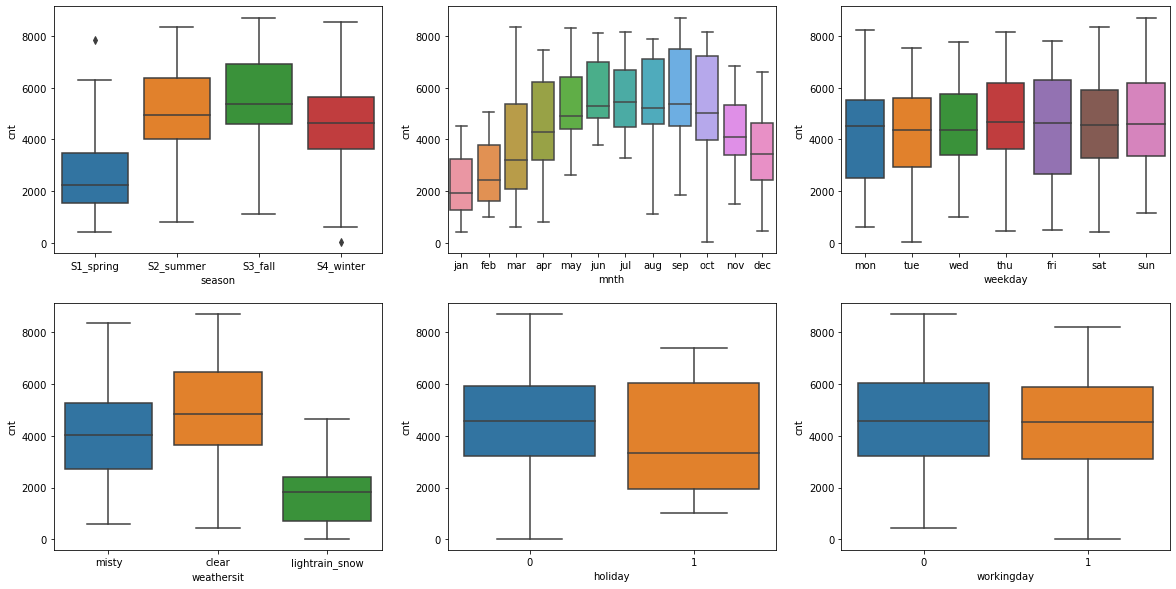

In [306]:
# Plot boxplot of all the categorical variables against the target variable 'cnt'


plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x= 'season', y= 'cnt', data= bikedata)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y= 'cnt', data= bikedata)
plt.subplot(2,3,3)
sns.boxplot(x= 'weekday', y= 'cnt', data= bikedata)
plt.subplot(2,3,4)
sns.boxplot(x= 'weathersit',y='cnt', data= bikedata)
plt.subplot(2,3,5)
sns.boxplot(x= 'holiday', y= 'cnt', data= bikedata)
plt.subplot(2,3,6)
sns.boxplot(x= 'workingday', y= 'cnt',data= bikedata)
plt.show()

In [307]:
#Function to generate statistics related to categorical variables
def category_stats(col):
    category_df= bikedata.groupby(col)['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending= False)
    category_df['sum_percent']= category_df['sum']/bikedata.cnt.sum()*100
    category_df['count_percent']= category_df['count']/bikedata.cnt.count()*100
    return round (category_df,2)

In [308]:
# Function to generate plots for category variables
def categorical_plot(col,x,y):
    plt.figure(figsize= (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data= bikedata)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data= bikedata, hue= 'yr',palette= 'Paired')
    plt.legend(labels= ['2018','2019'])
    return

#### Season

In [309]:
category_stats('season')

,sum,mean,count,sum_percent,count_percent
season,,,,,
S3_fall,1061129,5644.30,188,32.24,25.75
S2_summer,918589,4992.33,184,27.91,25.21
S4_winter,841613,4728.16,178,25.57,24.38
S1_spring,469514,2608.41,180,14.27,24.66


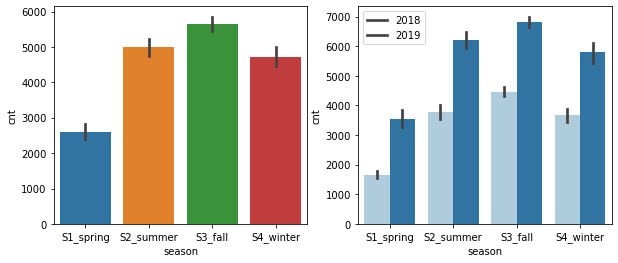

In [310]:
categorical_plot('season',10,4)

In [311]:
category_stats('mnth')

,sum,mean,count,sum_percent,count_percent
mnth,,,,,
aug,351194,5664.42,62,10.67,8.49
jun,346342,5772.37,60,10.52,8.22
sep,345991,5766.52,60,10.51,8.22
jul,344948,5563.68,62,10.48,8.49
may,331686,5349.77,62,10.08,8.49
oct,322352,5199.23,62,9.80,8.49
apr,269094,4484.90,60,8.18,8.22
nov,254831,4247.18,60,7.74,8.22
mar,228920,3692.26,62,6.96,8.49


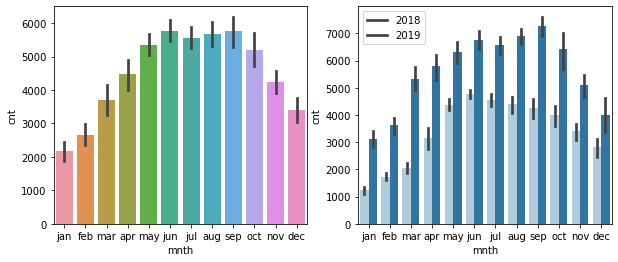

In [312]:
categorical_plot('mnth',10,4)

In [313]:
category_stats('weekday')

,sum,mean,count,sum_percent,count_percent
weekday,,,,,
thu,487923,4691.57,104,14.83,14.25
sun,485235,4665.72,104,14.74,14.25
sat,481176,4626.69,104,14.62,14.25
fri,478132,4597.42,104,14.53,14.25
wed,462276,4444.96,104,14.05,14.25
tue,448822,4274.50,105,13.64,14.38
mon,447281,4259.82,105,13.59,14.38


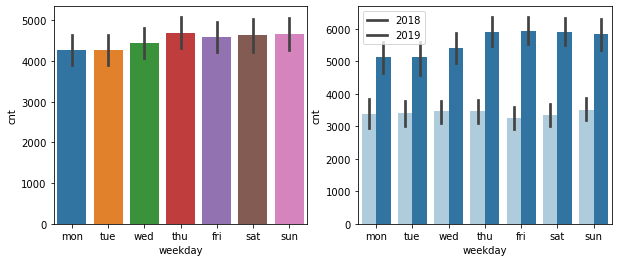

In [314]:
categorical_plot('weekday',10,4)

In [315]:
category_stats('weathersit')

,sum,mean,count,sum_percent,count_percent
weathersit,,,,,
clear,2257952,4876.79,463,68.61,63.42
misty,995024,4044.81,246,30.24,33.70
lightrain_snow,37869,1803.29,21,1.15,2.88


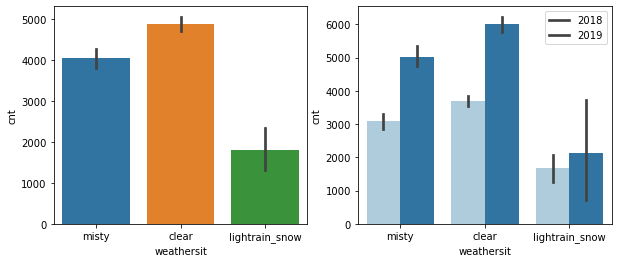

In [316]:
categorical_plot('weathersit',10,4)

In [317]:
category_stats('holiday')

,sum,mean,count,sum_percent,count_percent
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


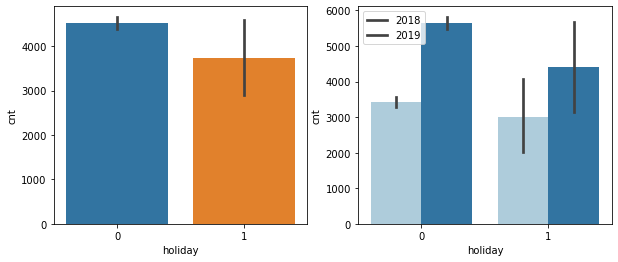

In [318]:
categorical_plot('holiday',10,4)

In [319]:
category_stats('workingday')

,sum,mean,count,sum_percent,count_percent
workingday,,,,,
1,2253988,4472.20,504,68.49,69.04
0,1036857,4587.86,226,31.51,30.96


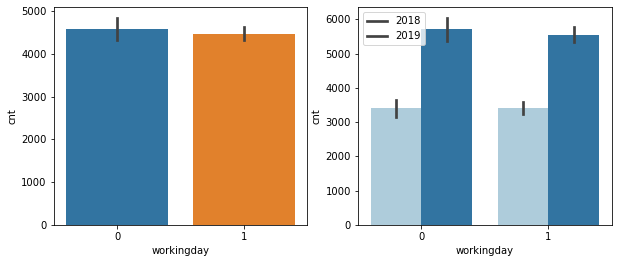

In [320]:
categorical_plot('workingday',10,4)

In [321]:
category_stats('yr')

,sum,mean,count,sum_percent,count_percent
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


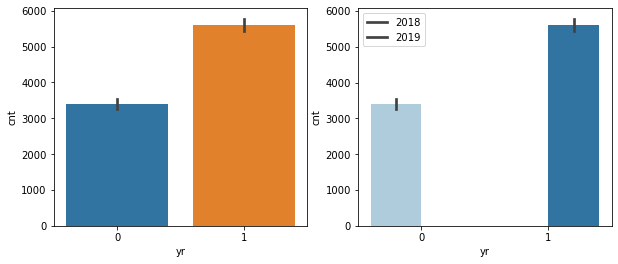

In [322]:
categorical_plot('yr',10,4)

### Numerical variable analysis

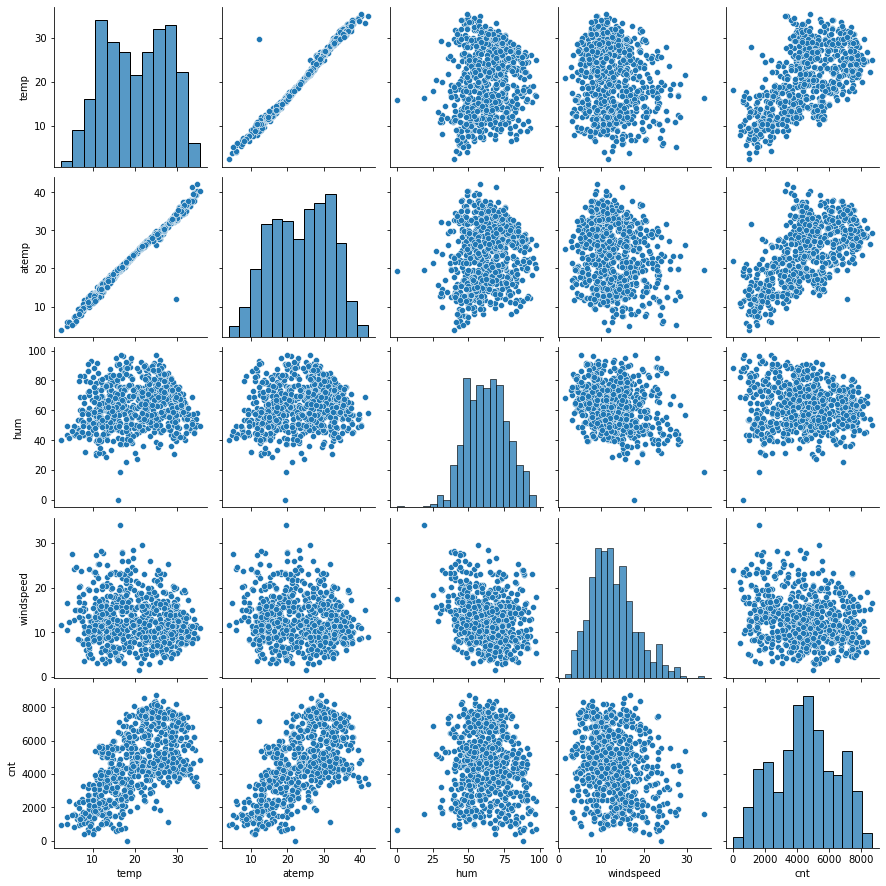

In [323]:
# Building pairplots to check the relationship between numeric variables
bikedata_numeric= bikedata[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bikedata_numeric)
plt.show()                           

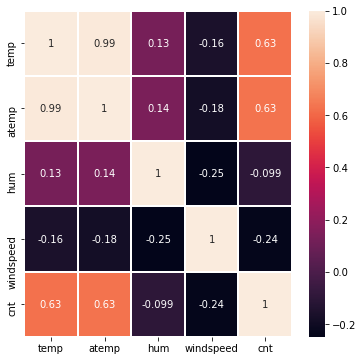

In [324]:
# Mapping a correlation heatmap to check correlation of the parameters
plt.figure(figsize=(6,6))
ax= sns.heatmap(bikedata_numeric.corr(),annot=True, linewidth= 1)

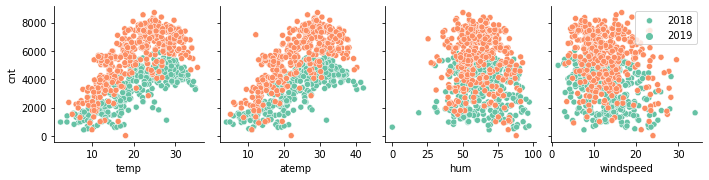

In [325]:
## Checking the impact of year against the numeric variable
ax= sns.pairplot(x_vars=['temp','atemp','hum','windspeed'], y_vars=['cnt'],data= bikedata,hue='yr', palette= 'Set2')
ax._legend.remove()
plt.legend(labels=[2018,2019])
plt.show()

### DATA PREPARATION

### Creating Dummy variable

#### Season

In [326]:
season= pd.get_dummies(bikedata['season'],drop_first= True)
season.head()

,S2_summer,S3_fall,S4_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


##### Weather

In [329]:
weather= pd.get_dummies(bikedata['weathersit'],drop_first= True)
weather.head()

,lightrain_snow,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


##### month

In [330]:
month= pd.get_dummies(bikedata['mnth'],drop_first= True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [331]:
weekday= pd.get_dummies(bikedata['weekday'],drop_first= True)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### Merging the DataFrames

In [332]:
# Creating a new dataframe called bikedata_new and add season, month,weather, weekday to the dataframe.
bikedata_new= pd.concat([bikedata,season,month,weather,weekday],axis=1)
bikedata_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,lightrain_snow,misty,mon,sat,sun,thu,tue,wed
0,S1_spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,S1_spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,S1_spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,S1_spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,S1_spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [333]:
bikedata_new.shape

(730, 34)

In [334]:
bikedata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  S2_summer       730 non-null    uint8  
 13  S3_fall         730 non-null    uint8  
 14  S4_winter       730 non-null    uint8  
 15  aug             730 non-null    uint8  
 16  dec             730 non-null    uint8  
 17  feb             730 non-null    uin

### Removing the unnecessary columns

In [335]:
# Deleting the unnecessary columns season,mnth,weathersit,weekday as they are already converted to binary columns data

bikedata_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace= True)
bikedata_new.shape

(730, 30)

In [220]:
bikedata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  jul             730 non-null    uint8  
 16  jun             730 non-null    uint8  
 17  mar             730 non-null    uin

### Splitting the data into Train and Test datasets

#### Train & Test split

In [336]:
# The Train and the Test data should always have the same number of rows.

np.random.seed(0)
bikedata_train,bikedata_test= train_test_split(bikedata_new,train_size= 0.7, random_state= 100)

##### Verifying the train,test split and new dataframe details

In [337]:
bikedata_train.shape

(510, 30)

In [338]:
bikedata_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_summer,S3_fall,...,oct,sep,lightrain_snow,misty,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255,0.247059,0.262745,...,0.084314,0.080392,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077,0.431725,0.440557,...,0.278131,0.272166,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [339]:
bikedata_test.shape

(220, 30)

In [340]:
bikedata_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_summer,S3_fall,...,oct,sep,lightrain_snow,misty,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,24.250312,61.934025,12.598352,4560.559091,0.263636,0.245455,...,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,7.672796,8.281075,14.429542,4.973534,1904.968544,0.441609,0.431338,...,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling bikedata_train dataframe

In [341]:
# Rescaling using MinMaxScaler

scaler= MinMaxScaler()

In [342]:
# Before scaling the dataframe

bikedata_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_summer,S3_fall,...,oct,sep,lightrain_snow,misty,mon,sat,sun,thu,tue,wed
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,1,0,0,1,0,0,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,1,0,0,1,0,0,0


In [343]:
# Applying scaler() to all the columns except the 'yes-no' and dummy variables

num_vars= ['temp','atemp','hum','windspeed','cnt']
bikedata_train[num_vars]= scaler.fit_transform(bikedata_train[num_vars])


In [344]:
# Checking after rescaling
 
bikedata_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_summer,S3_fall,...,oct,sep,lightrain_snow,misty,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,1,0,0,1,0,0,0


### Calculating the correlation coefficient

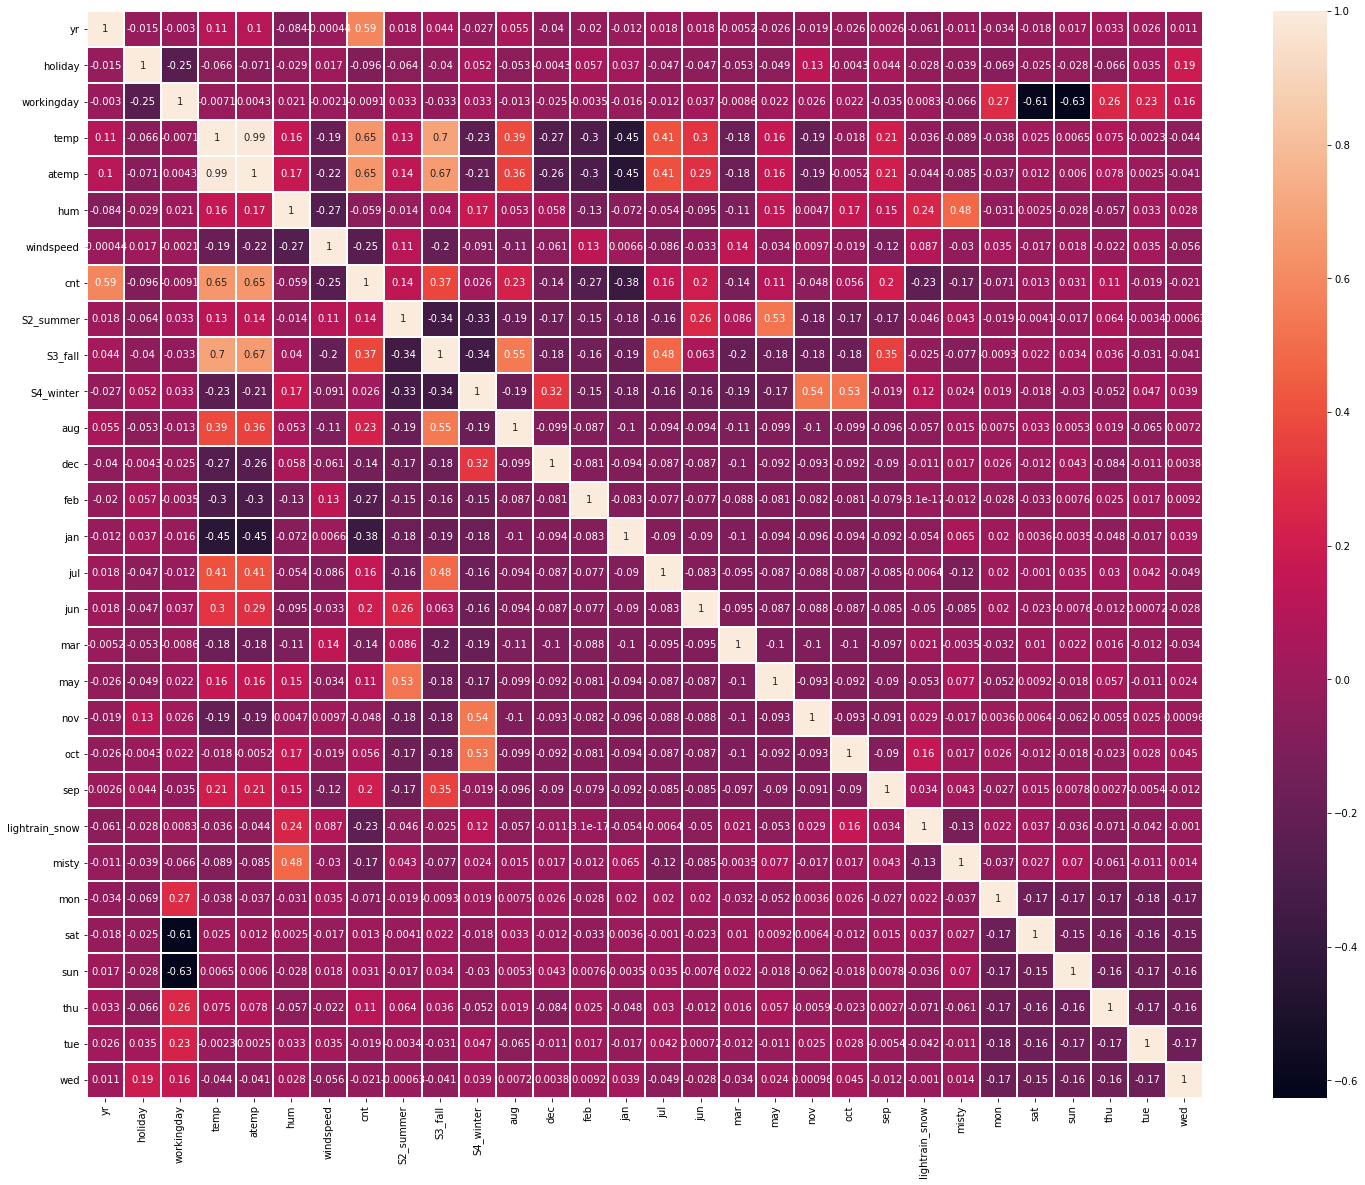

In [345]:
plt.figure(figsize= (25,20))
ax= sns.heatmap(bikedata_train.corr(),annot= True, linewidth= 1)
plt.show()

## Building the linear model

In [346]:
## Dividing into X_train and y_train
y_train= bikedata_train.pop('cnt')
X_train= bikedata_train


### RFE 

In [347]:
# RFE with the output number of the variable equal to 15

lm= LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(lm,15)
rfe= rfe.fit(X_train, y_train)

In [348]:
# Checking the parameters which are selected in the list of 15

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('S2_summer', True, 1),
 ('S3_fall', True, 1),
 ('S4_winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('lightrain_snow', True, 1),
 ('misty', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11)]

In [355]:
# Listing the 15 variables in a column

bikecol= X_train.columns[rfe.support_]
bikecol


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'S2_summer', 'S3_fall',
       'S4_winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'lightrain_snow',
       'misty'],
      dtype='object')

In [356]:
# Checking the columns which are eliminated
 
X_train.columns[~rfe.support_]


Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [357]:
# Creating X_train dataframe with the RFE selected variables

X_train_rfe= X_train[bikecol]
X_train_rfe

,yr,holiday,temp,hum,windspeed,S2_summer,S3_fall,S4_winter,dec,jan,jul,nov,sep,lightrain_snow,misty
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,1,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,1
79,0,0,0.462664,0.759870,0.529881,1,0,0,0,0,0,0,0,0,1


### Manual model development using statsmodel

In [359]:
# Function for VIF calculation

def calculateVIF(df):
    vif= pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF']= [variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
    vif['VIF']= round(vif['VIF'],2)
    vif= vif.sort_values(by= "VIF", ascending= False)
    return vif

### Model_1

In [360]:
# Creating a dataframe that contains all the features selected along with their VIF values 

calculateVIF(X_train_rfe)

,Features,VIF
2,temp,27.15
3,hum,21.08
6,S3_fall,7.52
7,S4_winter,4.07
4,windspeed,3.73
5,S2_summer,3.67
14,misty,2.20
0,yr,2.05
11,nov,1.90
9,jan,1.63


In [362]:
# Adding a constant

X_train_m1=sm.add_constant(X_train_rfe)

# Creating a first fitted model

LRm1= sm.OLS(y_train, X_train_m1).fit()

#Printing the first model

print(LRm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          8.15e-189
Time:                        16:07:05   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2584      0.029      9.

In [ ]:
Insight:
     As 'hum' has highest VIF values we have to remove the variable next. 

In [365]:
X_train_new= X_train_rfe.drop(['hum'], axis=1)

# Run the function to calculate VIF values of the new model

calculateVIF(X_train_new)

,Features,VIF
2,temp,14.99
5,S3_fall,7.28
6,S4_winter,4.00
4,S2_summer,3.67
3,windspeed,3.57
0,yr,2.05
10,nov,1.86
9,jul,1.59
13,misty,1.55
11,sep,1.43


### Model_2

In [366]:
# Adding a constant

X_train_m2= sm.add_constant(X_train_new)

# Creating a fitted model

LRm2= sm.OLS(y_train, X_train_m2).fit()

# Printing the linear regression model obtained

print(LRm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.75e-186
Time:                        17:11:47   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1738      0.021      8.

In [369]:
# Next variable with high VIF value is 'S3 fall', so we will remove it

X_train_new= X_train_new.drop(['S3_fall'], axis =1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,3.43
5,S4_winter,2.53
0,yr,2.05
4,S2_summer,1.83
9,nov,1.81
12,misty,1.54
8,jul,1.52
6,dec,1.40
10,sep,1.31


### Model_3

In [370]:
# Adding a constant

X_train_m3= sm.add_constant(X_train_new)

# Creating a fitted model

LRm3= sm.OLS(y_train, X_train_m3).fit()

# Printing the linear regression model obtained

print(LRm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          7.45e-185
Time:                        17:21:05   Log-Likelihood:                 499.26
No. Observations:                 510   AIC:                            -970.5
Df Residuals:                     496   BIC:                            -911.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1638      0.021      7.

In [371]:
# Lets remove 'nov' due to high p value

X_train_new= X_train_new.drop(['nov'], axis= 1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,3.37
0,yr,2.04
4,S2_summer,1.83
5,S4_winter,1.66
11,misty,1.54
8,jul,1.52
9,sep,1.30
6,dec,1.23
7,jan,1.22


### Model 4

In [372]:
# Adding a constant

X_train_m4= sm.add_constant(X_train_new)

# Creating a fitted model

LRm4= sm.OLS(y_train, X_train_m4).fit()

# Printing the linear regression model obtained

print(LRm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.48e-185
Time:                        17:25:30   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     497   BIC:                            -915.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1583      0.021      7.

In [375]:
## Lets remove 'dec' due to its high p value

X_train_new= X_train_new.drop(['dec'], axis=1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,3.34
0,yr,2.04
4,S2_summer,1.82
10,misty,1.54
7,jul,1.52
5,S4_winter,1.50
8,sep,1.29
6,jan,1.22
9,lightrain_snow,1.08


### Model_5

In [376]:
# Adding a constant

X_train_m5= sm.add_constant(X_train_new)

# Creating a fitted model

LRm5= sm.OLS(y_train, X_train_m5).fit()

# Printing the linear regression model obtained

print(LRm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.40e-186
Time:                        17:32:27   Log-Likelihood:                 496.84
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     498   BIC:                            -918.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1478      0.020      7.

In [377]:
# Lets remove 'jul' due to its high p-value

X_train_new= X_train_new.drop(['jul'], axis=1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.77
3,windspeed,3.31
0,yr,2.04
4,S2_summer,1.62
9,misty,1.53
5,S4_winter,1.42
6,jan,1.21
7,sep,1.21
8,lightrain_snow,1.08
1,holiday,1.04


### Model_6

In [378]:
# Adding a constant

X_train_m6= sm.add_constant(X_train_new)

# Creating a fitted model

LRm6= sm.OLS(y_train, X_train_m6).fit()

# Printing the linear regression model obtained

print(LRm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.06e-186
Time:                        17:36:43   Log-Likelihood:                 494.49
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     499   BIC:                            -920.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1522      0.020      7.

In [379]:
# lets remove 'jan' as it has high p-value

X_train_new= X_train_new.drop(['jan'], axis=1)
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,S2_summer,1.57
8,misty,1.48
5,S4_winter,1.37
6,sep,1.20
7,lightrain_snow,1.08
1,holiday,1.04


### Model_7

In [380]:
# Adding a constant

X_train_m7= sm.add_constant(X_train_new)

# Creating a fitted model

LRm7= sm.OLS(y_train, X_train_m7).fit()

# Printing the linear regression model obtained

print(LRm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.83e-186
Time:                        17:39:37   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

In [381]:
# Checking the parameters obtained

LRm7.params

const             0.125926
yr                0.232861
holiday          -0.098685
temp              0.548008
windspeed        -0.153246
S2_summer         0.088080
S4_winter         0.129345
sep               0.101195
lightrain_snow   -0.282869
misty            -0.078375
dtype: float64

### Interpretation of the Final_Model

## Linear Regression Model Assumptions Validation

### Linear relationship

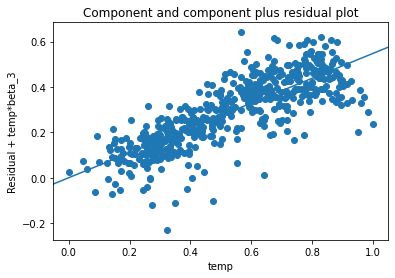

In [384]:
sm.graphics.plot_ccpr(LRm7, 'temp')
plt.show()

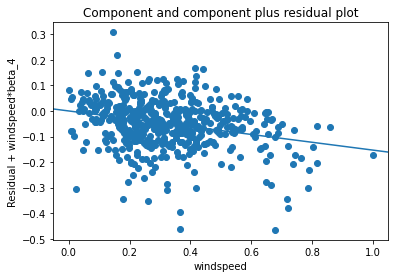

In [385]:
sm.graphics.plot_ccpr(LRm7, 'windspeed')
plt.show()

### Independence of Residuals

### Normality of Errors

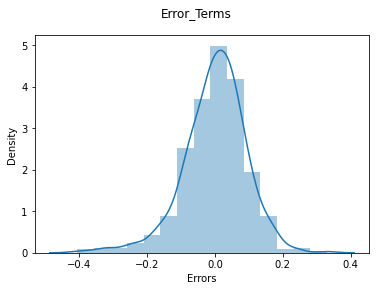

In [390]:
y_train_pred = LRm7.predict(X_train_m7)
res = y_train - y_train_pred

# Histogram for the Error terms

fig= plt.figure()
sns.distplot((res), bins= 15)
fig.suptitle('Error_Terms')
plt.xlabel('Errors')
plt.show()


### Homoscedasticity

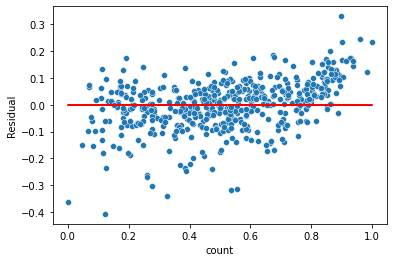

In [392]:
residual= y_train - y_train_pred
sns.scatterplot(y_train, residual)
plt.plot(y_train,(y_train- y_train), '-r')
plt.xlabel('count')
plt.ylabel('Residual')
plt.show()

### Absence of Multicollinearity

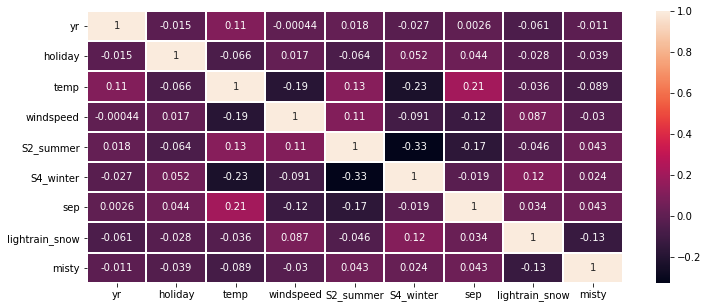

In [394]:
plt.figure(figsize=(12,5))
sns.heatmap(X_train_new.corr(), annot= True, linewidth= 1)
plt.show()

In [395]:
# VIF values of the final model

calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,S2_summer,1.57
8,misty,1.48
5,S4_winter,1.37
6,sep,1.20
7,lightrain_snow,1.08
1,holiday,1.04


## Predictions using Final_Model

### Scaling the test dataframe

In [396]:
bikedata_numeric = ['temp','atemp','hum','windspeed','cnt']
bikedata_test[bikedata_numeric] = scaler.transform(bikedata_test[bikedata_numeric])
bikedata_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_summer,S3_fall,...,oct,sep,lightrain_snow,misty,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [398]:
bikedata_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_summer,S3_fall,...,oct,sep,lightrain_snow,misty,mon,sat,sun,thu,tue,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [399]:
# Divide X_test and y_test

y_test= bikedata_test.pop('cnt')
X_test= bikedata_test

In [400]:
# Select variables that were part of final model

final_col= X_train_new.columns
X_test = X_test[final_col]

# Add constant variable to the test dataframe

X_test_LRm7 = sm.add_constant(X_test)


In [401]:
X_test_LRm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   holiday         220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   S2_summer       220 non-null    uint8  
 6   S4_winter       220 non-null    uint8  
 7   sep             220 non-null    uint8  
 8   lightrain_snow  220 non-null    uint8  
 9   misty           220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


In [403]:
# Making prediction using the final_model

y_pred= LRm7.predict(X_test_LRm7)

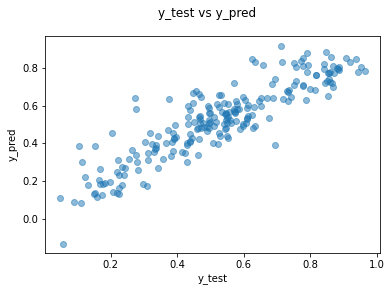

In [408]:
# Evaluation of the model
# to understand the spread of the y_test

fig=plt.figure
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#### Calculation of R2 value for bikedata_test dataframe


In [409]:
r2= round(r2_score(y_test, y_pred),4)
r2

0.7942

#### Calculation of Adjusted R2 value for bikedata_test dataframe

In [410]:
# 'n' is the number of rows in the test dataset

n= X_test.shape[0]

# Shape along axis 1 is the number of predictors(p) or features.

p= X_test.shape[1]

adjusted_r2= round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2


0.7854

In [415]:
# Calculating RMSE for the selected Model

RMSE= round(sqrt(mean_squared_error(y_test, y_pred)), 4)
RMSE

0.0992

In [416]:
# Calculating Mean Absolute Error for the selected model

MAE= round(mean_absolute_error(y_test,y_pred),4)
MAE

0.0758

## Model Outcome Summary